# Alzheimer's Disease Risk Prediction
Dataset for predicting Alzheimer's diagnosis using patient demographics, lifestyle, medical history, and cognitive assessments.
참가자는 환자의 건강 관련 데이터를 활용해 알츠하이머병 유무(Diagnosis) 를 예측하는 머신러닝 모델을 개발
#------------------------------------------------------------------------------

###**📁 제공 파일 안내**
train.csv – 학습용 데이터 (특징 + 정답인 Diagnosis 포함)

test.csv – 테스트용 데이터 (Diagnosis 없이 특징만 있음)

submission.csv – 예측 결과 제출 형식 예시

submission_template.csv – 제출 양식 템플릿 (PatientID, Diagnosis 열 포함)

data_Description.txt – 전체 데이터 설명이 담긴 텍스트 파일

###**🎯 대회 목표**
환자의 인구통계, 생활습관, 의학적 정보, 인지 및 기능 평가를 바탕으로
알츠하이머병 유무(Diagnosis) 를 예측하는 것이 목표

Diagnosis:

- 0 = 알츠하이머 없음

- 1 = 알츠하이머 있음

###**📐 데이터 형식**


- 파일 형식: CSV

- 각 행은 한 명의 환자 데이터

- 대부분의 컬럼은 숫자형 또는 이진형 (0/1)

###**🧾 주요 컬럼 설명**
1. 인구통계 정보

  Age: 나이 (60–90세)

  Gender: 성별 (0 = 남성, 1 = 여성)

  Ethnicity: 인종 (0 = 백인, 1 = 아프리카계 미국인, 2 = 아시아인, 3 = 기타)

2. 생활습관

  BMI: 체질량지수 (15–40)

  Smoking: 흡연 여부 (0 = 아니오, 1 = 예)

  AlcoholConsumption: 주간 음주량 (0–20단위)

  PhysicalActivity: 주간 신체 활동 시간 (0–10시간)

  DietQuality: 식단 점수 (0–10)

  SleepQuality: 수면의 질 점수 (4–10)

3. 의학적 병력

  FamilyHistoryAlzheimers: 가족력 (0 = 없음, 1 = 있음)

  CardiovascularDisease, Diabetes, Depression, HeadInjury, Hypertension: 각종 질병 여부 (0 = 없음, 1 = 있음)

4. 임상 측정

  SystolicBP, DiastolicBP: 혈압

  CholesterolTotal, CholesterolLDL, CholesterolHDL, CholesterolTriglycerides: 콜레스테롤 수치

5. 인지 및 기능 평가

  MMSE: 간이 정신 상태 검사 점수 (0–30)

  FunctionalAssessment: 기능 평가 점수 (0–10)

  MemoryComplaints, BehavioralProblems: 문제 유무 (0 = 없음, 1 = 있음)

  ADL: 일상생활 수행능력 점수 (0–10)

6. 증상

  Confusion, Disorientation, PersonalityChanges, DifficultyCompletingTasks, Forgetfulness: 모두 0/1 이진형 (해당 증상 있음/없음)

# Data Download

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import zipfile

!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/Kaggle/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!pip install kaggle
!kaggle competitions download -c alzheimers-disease-risk-prediction-eu-business

In [4]:
with zipfile.ZipFile("alzheimers-disease-risk-prediction-eu-business.zip", "r") as zip_ref:
  zip_ref.extractall("alzheimers-data")

# EDA

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df_train = pd.read_csv("alzheimers-data/train.csv")
df_test = pd.read_csv("alzheimers-data/test.csv")

df_train.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,6184,87,1,2,1,27.764232,1,16.543170,0.281379,5.923418,...,0,0,6.643693,0,0,0,0,0,0,XXXConfid
1,5381,70,0,0,3,37.098744,0,1.360202,9.242990,1.819284,...,0,1,3.884562,0,0,0,0,1,1,XXXConfid
2,4829,82,1,3,2,15.908275,0,16.329031,1.915913,6.607292,...,0,0,4.013722,0,0,1,1,0,1,XXXConfid
3,5117,76,1,0,2,30.302432,1,11.814030,6.281170,6.204349,...,0,0,9.355700,1,0,1,0,1,0,XXXConfid
4,6747,61,0,0,2,24.565357,1,2.273373,9.976581,2.057188,...,1,0,8.818932,0,1,0,0,0,1,XXXConfid


In [7]:
# 데이터 크기
print("데이터 크기:", df_train.shape)

데이터 크기: (1719, 35)


In [8]:
# 요약 정보
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1719 entries, 0 to 1718
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  1719 non-null   int64  
 1   Age                        1719 non-null   int64  
 2   Gender                     1719 non-null   int64  
 3   Ethnicity                  1719 non-null   int64  
 4   EducationLevel             1719 non-null   int64  
 5   BMI                        1719 non-null   float64
 6   Smoking                    1719 non-null   int64  
 7   AlcoholConsumption         1719 non-null   float64
 8   PhysicalActivity           1719 non-null   float64
 9   DietQuality                1719 non-null   float64
 10  SleepQuality               1719 non-null   float64
 11  FamilyHistoryAlzheimers    1719 non-null   int64  
 12  CardiovascularDisease      1719 non-null   int64  
 13  Diabetes                   1719 non-null   int64

In [9]:
# 결측치 확인
print("\n 결측치:")
print(df_train.isnull().sum())


 결측치:
PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
F

In [10]:
# 기본 통계
df_train.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,...,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000
mean,5822.347877,74.960442,0.500291,0.698080,1.283304,27.687408,0.286795,9.978133,4.942195,4.972312,...,5.069688,0.205934,0.156486,4.970744,0.201280,0.158813,0.148342,0.161722,0.296684,0.353112
std,620.850386,9.065000,0.500145,0.994836,0.904339,7.209284,0.452396,5.777363,2.827319,2.900920,...,2.890435,0.404500,0.363422,2.947606,0.401073,0.365608,0.355542,0.368303,0.456929,0.478076
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5292.500000,67.000000,0.000000,0.000000,1.000000,21.641242,0.000000,5.137582,2.612521,2.415726,...,2.562307,0.000000,0.000000,2.324166,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5820.000000,75.000000,1.000000,0.000000,1.000000,27.919813,0.000000,9.805564,4.801357,5.050778,...,5.098709,0.000000,0.000000,5.026306,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6357.500000,83.000000,1.000000,1.000000,2.000000,33.842594,1.000000,15.181033,7.380416,7.480424,...,7.496824,0.000000,0.000000,7.583825,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.997203,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


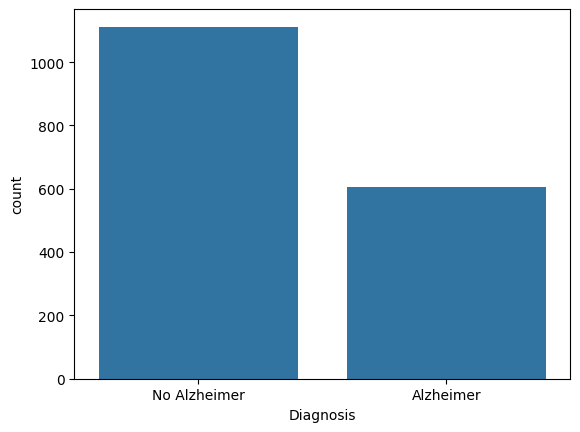

Diagnosis
0    0.646888
1    0.353112
Name: proportion, dtype: float64


In [11]:
sns.countplot(x='Diagnosis', data=df_train)
plt.xticks([0, 1], ['No Alzheimer', 'Alzheimer'])
plt.show()

print(df_train['Diagnosis'].value_counts(normalize=True))

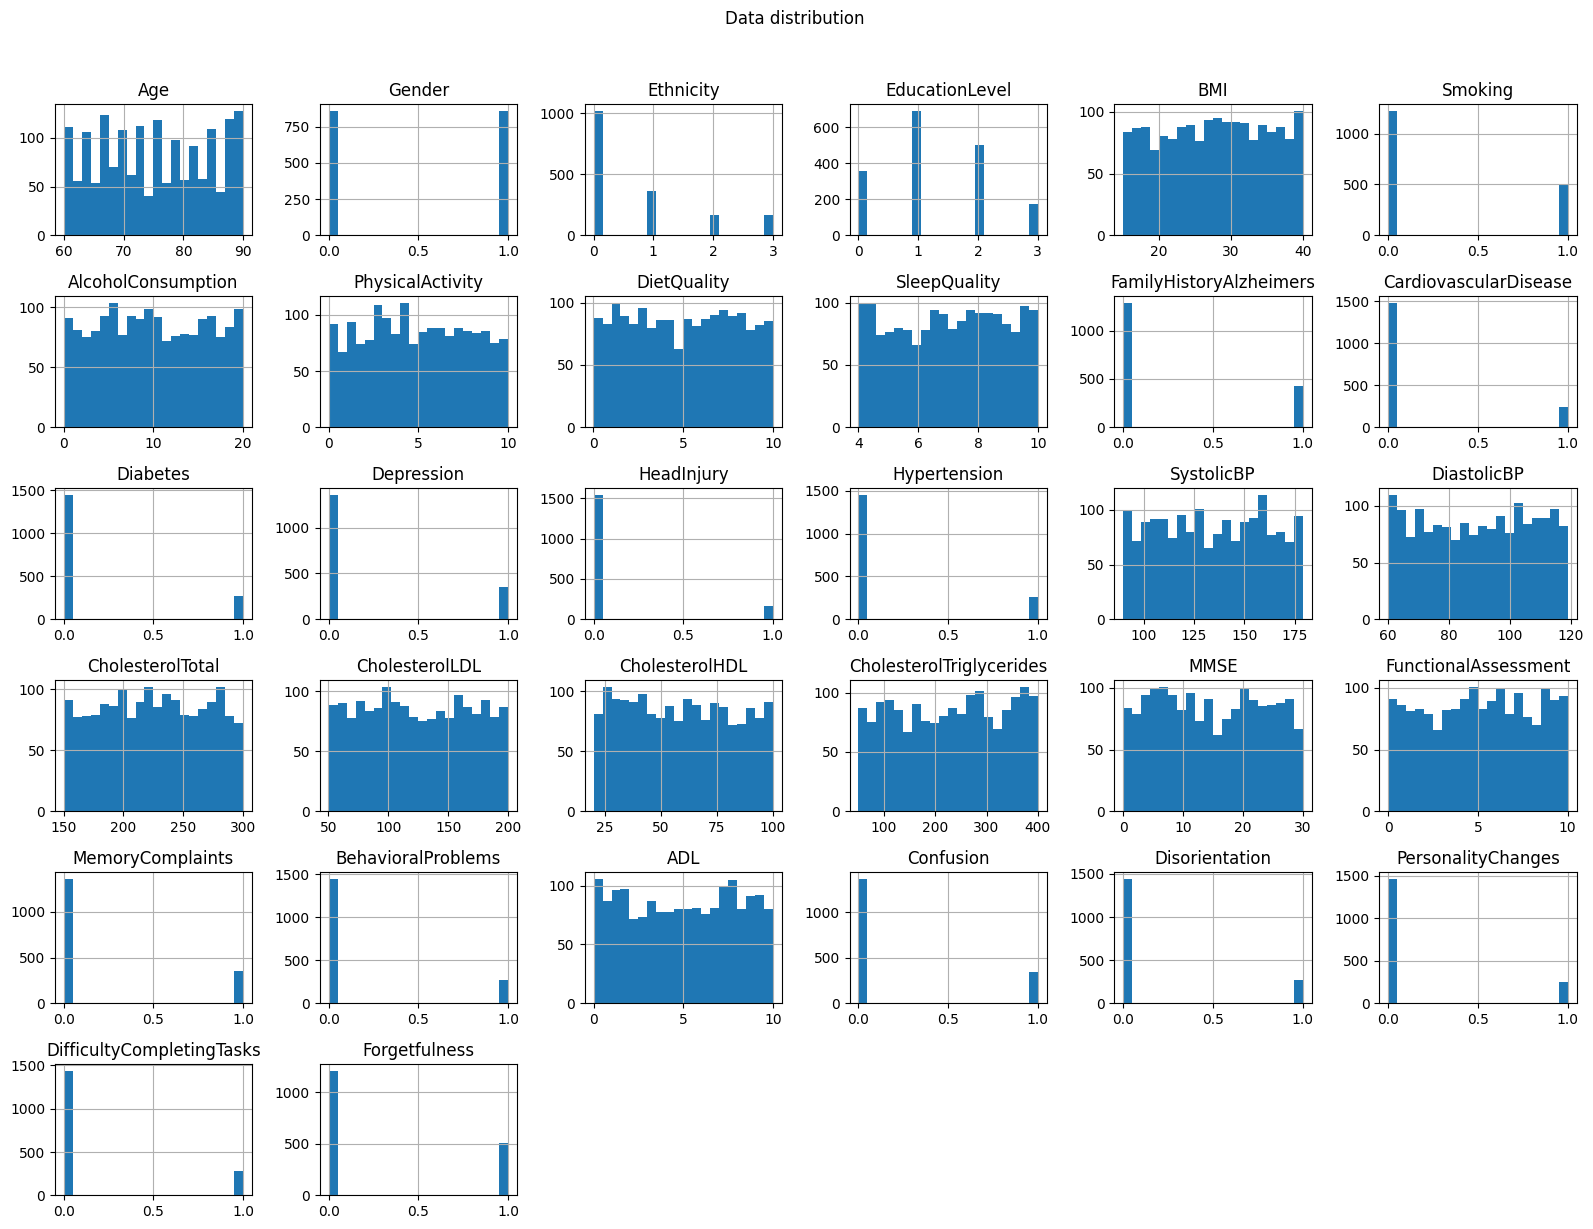

In [12]:
# 수치형 컬럼 리스트
numeric_cols = df_train.select_dtypes(include=np.number).columns.tolist()
numeric_cols.remove("Diagnosis")
numeric_cols.remove("PatientID")

# 히스토그램
df_train[numeric_cols].hist(bins=20, figsize=(16, 12))
plt.suptitle("Data distribution", y=1.02)
plt.tight_layout()
plt.show()

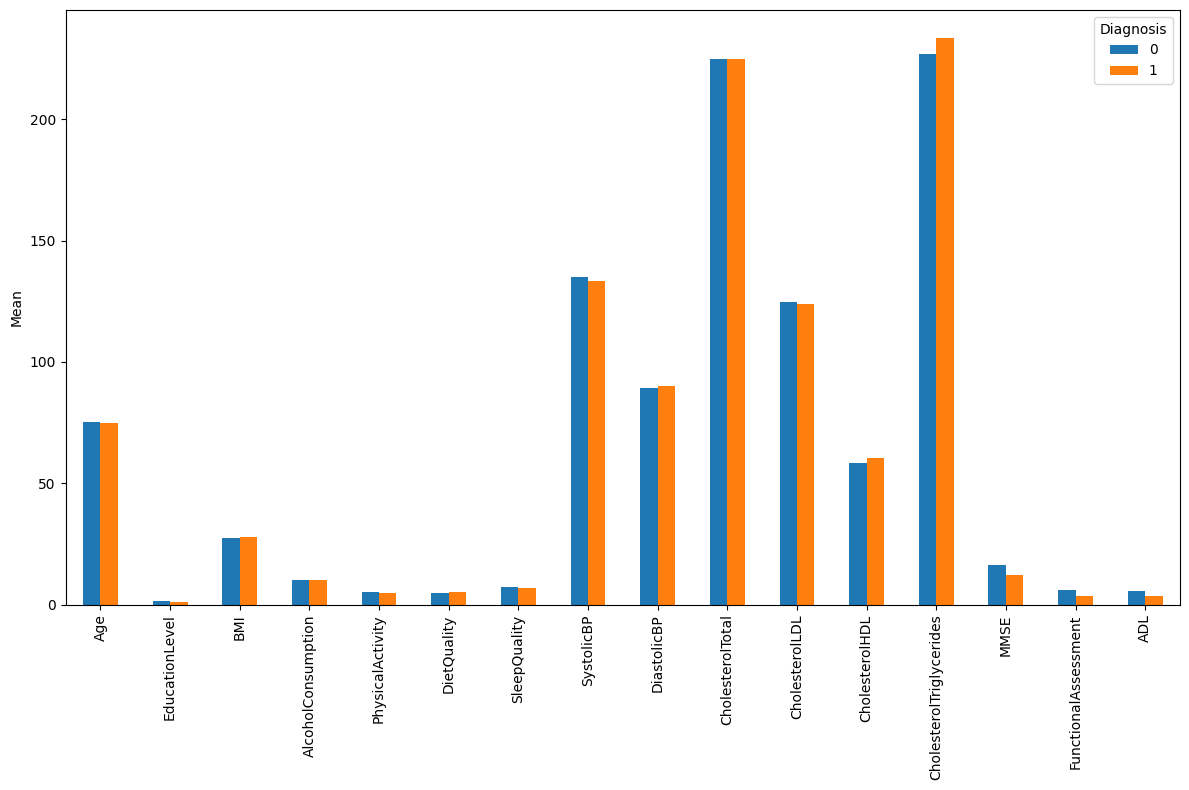

In [13]:
categorical_cols = [
    'Gender',
    'Ethnicity',
    'Smoking',
    'FamilyHistoryAlzheimers',
    'CardiovascularDisease',
    'Diabetes',
    'Depression',
    'HeadInjury',
    'Hypertension',
    'MemoryComplaints',
    'BehavioralProblems',
    'Confusion',
    'Disorientation',
    'PersonalityChanges',
    'DifficultyCompletingTasks',
    'Forgetfulness'
]
exclude_cols = categorical_cols
continuous_cols = [col for col in numeric_cols if col not in exclude_cols]

mean_by_target = df_train.groupby('Diagnosis')[continuous_cols].mean().T
mean_by_target.plot(kind='bar', figsize=(12, 8))
plt.ylabel("Mean")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Basic NN

In [14]:
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import random_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def seed_everything(seed=42):
    np.random.seed(seed)
    torch.manual_seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)

seed_everything(42)

In [15]:
class AlzheimerDataset(Dataset):
    def __init__(self, df=None, scaler=None, is_test=False):

        self.is_test = is_test

        df = df.drop(columns=['PatientID'])
        df = df.drop(columns=['DoctorInCharge'])

        if not is_test:
            self.y = torch.tensor(df['Diagnosis'].values, dtype=torch.float32)
            df = df.drop(columns=['Diagnosis'])
        else:
            self.y = None

        self.X_raw = df

        if scaler is None:
            self.scaler = StandardScaler()
            self.X = torch.tensor(self.scaler.fit_transform(self.X_raw), dtype=torch.float32)
        else:
            self.scaler = scaler
            self.X = torch.tensor(self.scaler.transform(self.X_raw), dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        if self.is_test:
            return self.X[idx]
        else:
            return self.X[idx], self.y[idx]

In [16]:
# 데이터프레임 로드
df_all = pd.read_csv("alzheimers-data/train.csv")
df_test = pd.read_csv("alzheimers-data/test.csv")

# train/valid 80/20
df_train, df_valid = train_test_split(
    df_all,
    test_size=0.2,
    stratify=df_all["Diagnosis"],  # 클래스 비율 유지
    random_state=42
)

# 학습용 Dataset 생성
train_dataset = AlzheimerDataset(df=df_train)

# 검증용 Dataset 생성
valid_dataset = AlzheimerDataset(df=df_valid, scaler=train_dataset.scaler)

# 테스트 Dataset
test_dataset = AlzheimerDataset(df=df_test, scaler=train_dataset.scaler, is_test=True)

# DataLoader
g = torch.Generator()
g.manual_seed(42)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, generator=g)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [17]:
for X, y in train_loader:
    print("Train of X: ", X.shape)
    print("Train of y: ", y.shape, y.dtype)
    break

Train of X:  torch.Size([32, 32])
Train of y:  torch.Size([32]) torch.float32


In [18]:
class AlzheimerClassifier(nn.Module):
    def __init__(self, input_dim):
        super(AlzheimerClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

In [19]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

input_dim = next(iter(train_loader))[0].shape[1]
model = AlzheimerClassifier(input_dim).to(device)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=10e-3)

Using cuda device


In [20]:
from sklearn.metrics import f1_score

EPOCHS = 25

for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device).unsqueeze(1)

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for X_val, y_val in valid_loader:
            X_val, y_val = X_val.to(device), y_val.to(device).unsqueeze(1)
            preds = model(X_val)
            preds = (preds > 0.5).float()
            y_true.extend(y_val.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

    f1 = f1_score(y_true, y_pred)
    print(f"Epoch {epoch+1}/{EPOCHS} | Loss: {running_loss:.4f} | Val F1: {f1:.4f}")

Epoch 1/25 | Loss: 20.5527 | Val F1: 0.7452
Epoch 2/25 | Loss: 14.5108 | Val F1: 0.7417
Epoch 3/25 | Loss: 12.6685 | Val F1: 0.7281
Epoch 4/25 | Loss: 11.3523 | Val F1: 0.7184
Epoch 5/25 | Loss: 9.7054 | Val F1: 0.7799
Epoch 6/25 | Loss: 9.2288 | Val F1: 0.6787
Epoch 7/25 | Loss: 7.1508 | Val F1: 0.7175
Epoch 8/25 | Loss: 6.1906 | Val F1: 0.7089
Epoch 9/25 | Loss: 4.6943 | Val F1: 0.7426
Epoch 10/25 | Loss: 3.8976 | Val F1: 0.7600
Epoch 11/25 | Loss: 3.8458 | Val F1: 0.6870
Epoch 12/25 | Loss: 3.1733 | Val F1: 0.6971
Epoch 13/25 | Loss: 4.3177 | Val F1: 0.6880
Epoch 14/25 | Loss: 3.6324 | Val F1: 0.6781
Epoch 15/25 | Loss: 2.5801 | Val F1: 0.6968
Epoch 16/25 | Loss: 1.6507 | Val F1: 0.6903
Epoch 17/25 | Loss: 2.1088 | Val F1: 0.7059
Epoch 18/25 | Loss: 1.2674 | Val F1: 0.7059
Epoch 19/25 | Loss: 0.5645 | Val F1: 0.7296
Epoch 20/25 | Loss: 0.3112 | Val F1: 0.7404
Epoch 21/25 | Loss: 0.1817 | Val F1: 0.7364
Epoch 22/25 | Loss: 0.1496 | Val F1: 0.7373
Epoch 23/25 | Loss: 0.1381 | Val F1: 

# 10-fold cross validation

In [21]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd
import numpy as np
import joblib
import os

def seed_everything(seed=42):
    np.random.seed(seed)
    torch.manual_seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)

seed_everything(42)

In [22]:
# csv 데이터 로드
df = pd.read_csv("alzheimers-data/train.csv")
device = "cuda" if torch.cuda.is_available() else "cpu"

# K-Fold 설정
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
f1_scores = []

# 모델 정의
class AlzheimerClassifier(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return torch.sigmoid(self.fc3(x))

# K-Fold 루프 시작
for fold, (train_idx, val_idx) in enumerate(skf.split(df.drop(columns=['Diagnosis', 'PatientID']), df['Diagnosis'])):
    print(f"\nFold {fold + 1}/{n_splits}")

    df_train = df.iloc[train_idx].reset_index(drop=True)
    df_val = df.iloc[val_idx].reset_index(drop=True)

    scaler = StandardScaler()

    # Dataset 생성
    train_dataset = AlzheimerDataset(df=df_train, scaler=None, is_test=False)
    val_dataset = AlzheimerDataset(df=df_val, scaler=train_dataset.scaler, is_test=False)

    # DataLoader
    g = torch.Generator()
    g.manual_seed(42)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True,generator=g)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

    # 모델 초기화
    input_dim = train_dataset.X.shape[1]
    model = AlzheimerClassifier(input_dim=input_dim).to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.BCELoss()

    # 학습
    EPOCH = 25
    for epoch in range(EPOCH):
        model.train()
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device).unsqueeze(1)

            optimizer.zero_grad()
            preds = model(X_batch)
            loss = criterion(preds, y_batch)
            loss.backward()
            optimizer.step()

    # 검증
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device).unsqueeze(1)
            outputs = model(X_batch)
            preds = (outputs > 0.5).float()
            y_true.extend(y_batch.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

    f1 = f1_score(y_true, y_pred)
    f1_scores.append(f1)
    print(f"Fold {fold + 1} F1 Score: {f1:.4f}")

    model_dir = "model"
    os.makedirs(model_dir, exist_ok=True)

    scaler_dir = "scaler"
    os.makedirs(scaler_dir, exist_ok=True)

    torch.save(model.state_dict(), f"{model_dir}/model_fold{fold+1}.pt")
    joblib.dump(train_dataset.scaler, f"{scaler_dir}/scaler_fold{fold+1}.pkl")

# 평균 F1 출력
print(f"\n평균 F1 Score (10-Fold): {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")


Fold 1/10
Fold 1 F1 Score: 0.7478

Fold 2/10
Fold 2 F1 Score: 0.7288

Fold 3/10
Fold 3 F1 Score: 0.7748

Fold 4/10
Fold 4 F1 Score: 0.6935

Fold 5/10
Fold 5 F1 Score: 0.7121

Fold 6/10
Fold 6 F1 Score: 0.6981

Fold 7/10
Fold 7 F1 Score: 0.7414

Fold 8/10
Fold 8 F1 Score: 0.7627

Fold 9/10
Fold 9 F1 Score: 0.7667

Fold 10/10
Fold 10 F1 Score: 0.8305

평균 F1 Score (10-Fold): 0.7456 ± 0.0390


In [23]:
FOLD_TO_USE = 10
input_dim = train_dataset.X.shape[1]
loaded_scaler = joblib.load(f"scaler/scaler_fold{FOLD_TO_USE}.pkl")
model = AlzheimerClassifier(input_dim).to(device)
model.load_state_dict(torch.load(f"model/model_fold{FOLD_TO_USE}.pt"))
model.eval()

AlzheimerClassifier(
  (fc1): Linear(in_features=32, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
)

In [24]:
# test dataset 준비
df_test = pd.read_csv("alzheimers-data/test.csv")
test_dataset = AlzheimerDataset(df=df_test, scaler=loaded_scaler, is_test=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 예측
test_preds = []
with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch)
        preds = (outputs > 0.5).int().squeeze().cpu().numpy()
        test_preds.extend(preds)

# submission 저장
submission = pd.read_csv("alzheimers-data/submission_template.csv")
submission['Diagnosis'] = test_preds
submission.to_csv(f"submission_nn_fold{FOLD_TO_USE}.csv", index=False)
print(f"Fold {FOLD_TO_USE} 모델 기반 submission 저장.")

Fold 10 모델 기반 submission 저장.


# TabNet finnetuning

In [25]:
!pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 80.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
import random
import os

def seed_everything(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)

seed_everything(42)

In [27]:
df = pd.read_csv("alzheimers-data/train.csv")
X = df.drop(columns=["PatientID", "Diagnosis", "DoctorInCharge"], errors="ignore").values
y = df["Diagnosis"].values

# 스케일링
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 10-Fold Cross Validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
f1_scores = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    print(f"\nFold {fold+1}/10")

    X_train, y_train = X[train_idx], y[train_idx]
    X_val, y_val = X[val_idx], y[val_idx]

    model = TabNetClassifier(seed=42, verbose=0)
    model.fit(
        X_train=X_train, y_train=y_train,
        eval_set=[(X_val, y_val)],
        eval_metric=['auc'],
        max_epochs=100,
        patience=10,
        batch_size=128,
        virtual_batch_size=64
    )

    preds = model.predict(X_val)
    f1 = f1_score(y_val, preds)
    f1_scores.append(f1)
    print(f"Fold {fold+1} F1 Score: {f1:.4f}")

    os.makedirs("tabnet_models", exist_ok=True)
    model.save_model(f"tabnet_models/tabnet_fold{fold+1}")
    os.makedirs("tabnet_scalers", exist_ok=True)
    joblib.dump(scaler, f"tabnet_scalers/scaler_fold{fold+1}.pkl")

print(f"\n평균 F1 Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")


Fold 1/10

Early stopping occurred at epoch 56 with best_epoch = 46 and best_val_0_auc = 0.96548
Fold 1 F1 Score: 0.8640
Successfully saved model at tabnet_models/tabnet_fold1.zip

Fold 2/10


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 40 with best_epoch = 30 and best_val_0_auc = 0.94658
Fold 2 F1 Score: 0.9000
Successfully saved model at tabnet_models/tabnet_fold2.zip

Fold 3/10


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 37 with best_epoch = 27 and best_val_0_auc = 0.9331
Fold 3 F1 Score: 0.7826
Successfully saved model at tabnet_models/tabnet_fold3.zip

Fold 4/10


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 48 with best_epoch = 38 and best_val_0_auc = 0.94521


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Fold 4 F1 Score: 0.8293
Successfully saved model at tabnet_models/tabnet_fold4.zip

Fold 5/10

Early stopping occurred at epoch 33 with best_epoch = 23 and best_val_0_auc = 0.94432


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Fold 5 F1 Score: 0.8257
Successfully saved model at tabnet_models/tabnet_fold5.zip

Fold 6/10

Early stopping occurred at epoch 33 with best_epoch = 23 and best_val_0_auc = 0.92077
Fold 6 F1 Score: 0.8305
Successfully saved model at tabnet_models/tabnet_fold6.zip

Fold 7/10


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 48 with best_epoch = 38 and best_val_0_auc = 0.9294
Fold 7 F1 Score: 0.8413
Successfully saved model at tabnet_models/tabnet_fold7.zip

Fold 8/10


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 63 with best_epoch = 53 and best_val_0_auc = 0.95274
Fold 8 F1 Score: 0.8750
Successfully saved model at tabnet_models/tabnet_fold8.zip

Fold 9/10


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 52 with best_epoch = 42 and best_val_0_auc = 0.93856
Fold 9 F1 Score: 0.8618
Successfully saved model at tabnet_models/tabnet_fold9.zip

Fold 10/10


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 35 with best_epoch = 25 and best_val_0_auc = 0.92748
Fold 10 F1 Score: 0.7797
Successfully saved model at tabnet_models/tabnet_fold10.zip

평균 F1 Score: 0.8390 ± 0.0363


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [30]:
FOLD_TO_USE = 2

# test 데이터 준비
df_test = pd.read_csv("alzheimers-data/test.csv")
X_test = df_test.drop(columns=["PatientID", "DoctorInCharge"], errors="ignore").values

# 저장된 스케일러 로드
scaler = joblib.load(f"tabnet_scalers/scaler_fold{FOLD_TO_USE}.pkl")
X_test_scaled = scaler.transform(X_test)

# 모델 로드
model = TabNetClassifier()
model.load_model(f"tabnet_models/tabnet_fold{FOLD_TO_USE}.zip")

# 예측
test_preds = model.predict(X_test_scaled)

# 제출 파일 생성
submission = pd.read_csv("alzheimers-data/submission_template.csv")
submission["Diagnosis"] = test_preds
submission.to_csv(f"submission_tb_fold{FOLD_TO_USE}.csv", index=False)
print(f"✅ Fold {FOLD_TO_USE} 모델 기반 submission 저장 완료!")

✅ Fold 2 모델 기반 submission 저장 완료!


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
